In [1]:
# Necessary Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchinfo import summary

In [2]:
# Generate dataset consisting of 4 two-dimensional Gaussians
np.random.seed(42)
dataset_size = 20000
means = [[2, 2], [2, -2], [-2, 2], [-2, -2]]
covariances = [np.eye(2) for _ in range(4)]

X = np.vstack([np.random.multivariate_normal(mean, covariance, int(dataset_size/4)) for mean, covariance in zip(means, covariances)])
Y = np.hstack([np.zeros(int(dataset_size/4)) + i for i in range(4)])

# Randomly permute the data set
permutations = np.random.permutation(dataset_size)
X = X[permutations]
Y = Y[permutations]

In [3]:
# Split into training and testing sets
test_size = int(dataset_size * 0.1)
X_test = torch.Tensor(X[:test_size])
Y_test = torch.Tensor(Y[:test_size]).long()

X_train = torch.Tensor(X[test_size:])
Y_train = torch.Tensor(Y[test_size:]).long()

## Now, we will design the Neural Network as per the following architecture:

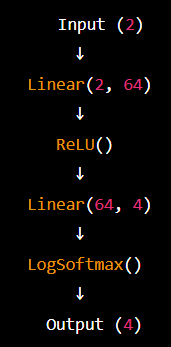

In [4]:
# Define the neural network architecture
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        
        return torch.log_softmax(x, dim = 1)

In [5]:
# Initialize the neural network
model = NeuralNetwork(input_size = 2, hidden_size = 64, num_classes = 4)
summary(model)

Layer (type:depth-idx)                   Param #
NeuralNetwork                            --
├─Linear: 1-1                            192
├─Linear: 1-2                            260
Total params: 452
Trainable params: 452
Non-trainable params: 0

In [6]:
# Define the loss function and optimizer
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)

In [7]:
# Train the neural network
num_epochs = 20
batch_size = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for i in range(0, X_train.shape[0], batch_size):
        # Get mini-batch of data
        inputs = X_train[i:i+batch_size]
        labels = Y_train[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        
    train_loss = running_loss/(X_train.shape[0]/batch_size)
    train_losses.append(train_loss)

    # Evaluate on test set
    with torch.no_grad():
        outputs = model(X_test)
        test_loss = criterion(outputs, Y_test)
        test_losses.append(test_loss.item())

    print('Epoch %d: Train Loss=%.3f, Test Loss=%.3f' % (epoch+1, train_loss, test_loss))

Epoch 1: Train Loss=0.513, Test Loss=0.283
Epoch 2: Train Loss=0.231, Test Loss=0.205
Epoch 3: Train Loss=0.184, Test Loss=0.177
Epoch 4: Train Loss=0.164, Test Loss=0.163
Epoch 5: Train Loss=0.153, Test Loss=0.154
Epoch 6: Train Loss=0.146, Test Loss=0.148
Epoch 7: Train Loss=0.141, Test Loss=0.144
Epoch 8: Train Loss=0.137, Test Loss=0.141
Epoch 9: Train Loss=0.135, Test Loss=0.139
Epoch 10: Train Loss=0.133, Test Loss=0.137
Epoch 11: Train Loss=0.131, Test Loss=0.136
Epoch 12: Train Loss=0.130, Test Loss=0.135
Epoch 13: Train Loss=0.129, Test Loss=0.134
Epoch 14: Train Loss=0.128, Test Loss=0.133
Epoch 15: Train Loss=0.127, Test Loss=0.133
Epoch 16: Train Loss=0.126, Test Loss=0.132
Epoch 17: Train Loss=0.126, Test Loss=0.132
Epoch 18: Train Loss=0.125, Test Loss=0.131
Epoch 19: Train Loss=0.125, Test Loss=0.131
Epoch 20: Train Loss=0.125, Test Loss=0.131


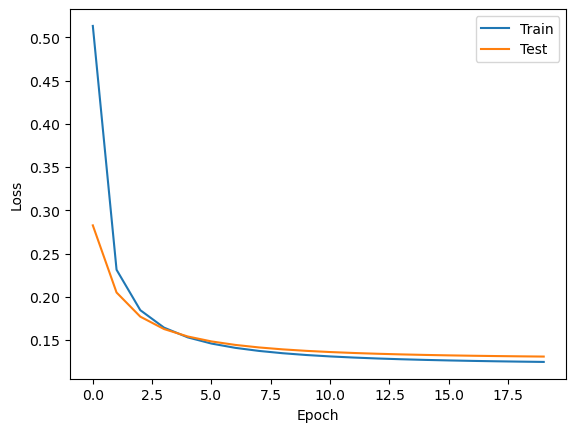

In [8]:
# Plot the train and test loss as a function of the training time
plt.plot(train_losses, label = 'Train')
plt.plot(test_losses, label = 'Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
# Report the final training and test accuracy
with torch.no_grad():
    train_outputs = model(X_train)
    train_predicted = torch.argmax(train_outputs, dim=1)
    train_accuracy = torch.sum(train_predicted == Y_train) / Y_train.shape[0]
    test_outputs = model(X_test)
    test_predicted = torch.argmax(test_outputs, dim = 1)
    test_accuracy = torch.sum(test_predicted == Y_test) / Y_test.shape[0]
    
print('Final Training Accuracy=%.3f' % train_accuracy)
print('Final Test Accuracy=%.3f' % test_accuracy)

Final Training Accuracy=0.956
Final Test Accuracy=0.951
